In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import matplotlib.pyplot as plt #그래프 모듈
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv',parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
#데이터의 타입과 구조

print('데이터의 구조는 :',df.shape)
print('데이터의 타입은 :',df.dtypes)
print('데이터의 칼럼은 :',df.columns)

데이터의 구조는 : (17414, 10)
데이터의 타입은 : timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은 : Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

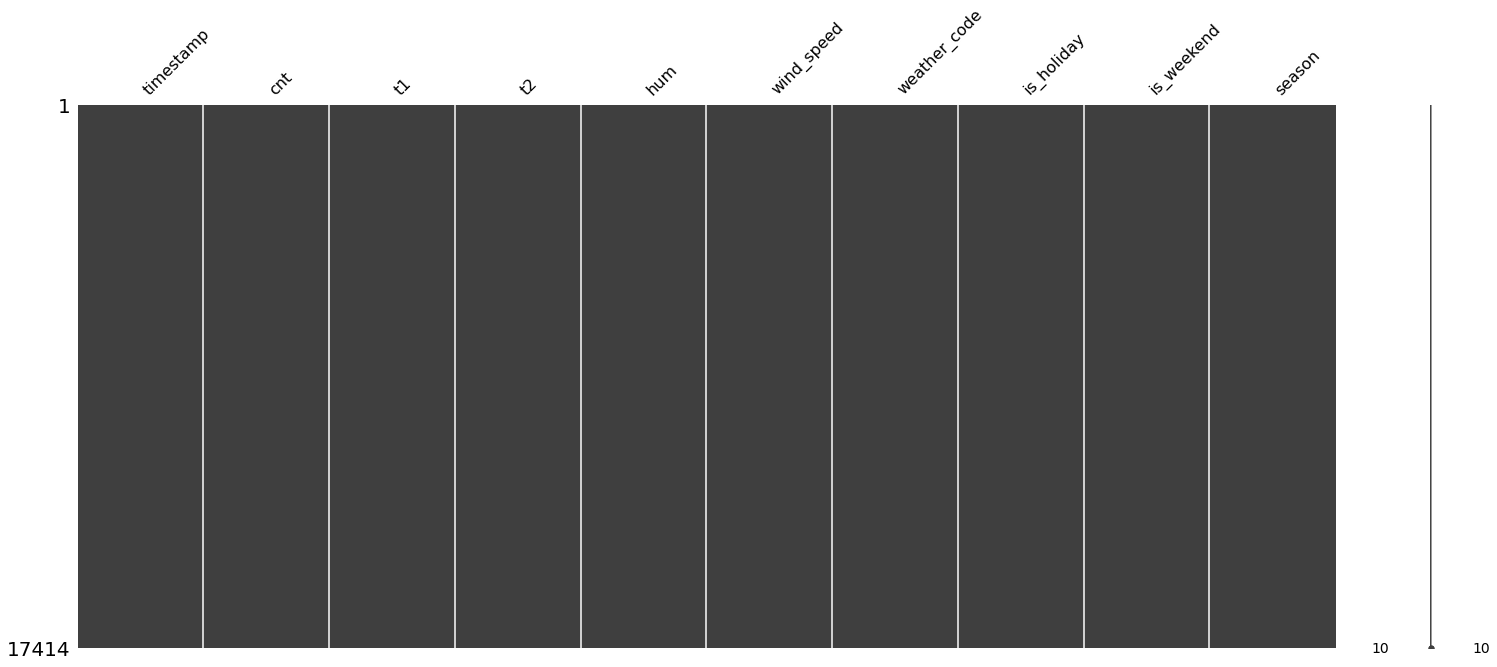

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df['year']= df['timestamp'].dt.year
df['month']= df['timestamp'].dt.month
df['dayofweek']= df['timestamp'].dt.dayofweek
df['hour']= df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [8]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='year', ylabel='cnt'>

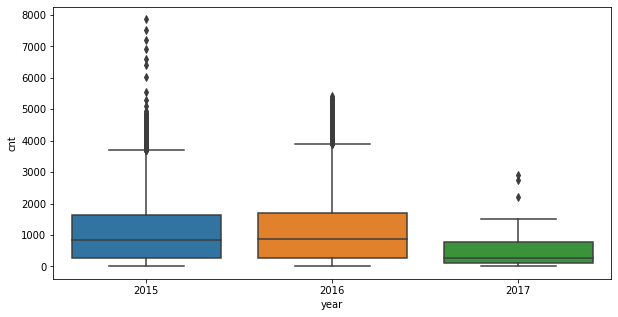

In [9]:
a, b = plt.subplots(1,1,figsize=(10, 5))
sns.boxplot(x=df['year'], y=df['cnt'])

<AxesSubplot:xlabel='month', ylabel='cnt'>

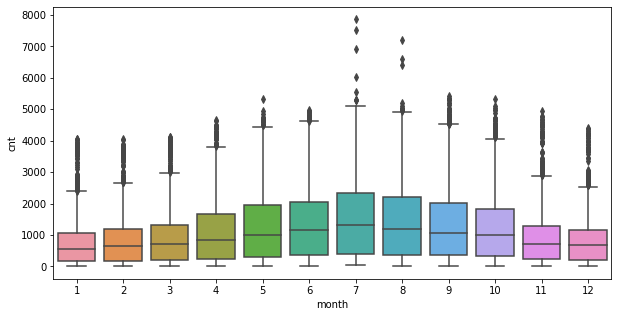

In [10]:
a,b = plt.subplots(1,1,figsize=(10, 5))
sns.boxplot(x=df['month'], y=df['cnt'])

<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

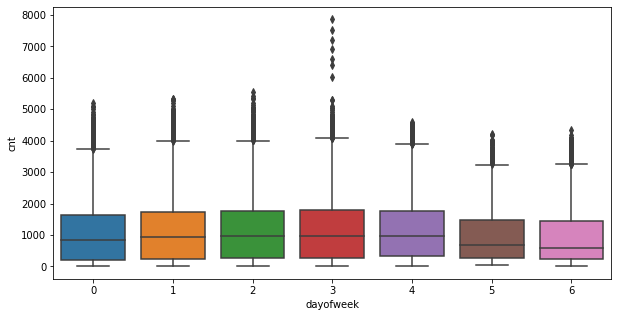

In [11]:
a,b = plt.subplots(1,1,figsize=(10, 5))
sns.boxplot(x=df['dayofweek'], y=df['cnt'])

<AxesSubplot:xlabel='hour', ylabel='cnt'>

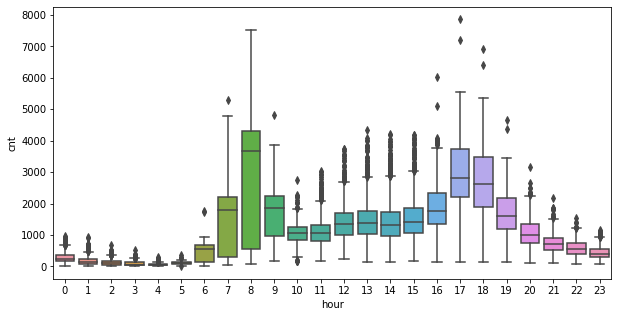

In [12]:
a,b = plt.subplots(1,1,figsize=(10, 5))
sns.boxplot(x=df['hour'], y=df['cnt'])

In [13]:
#그래프 함수 만들기

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

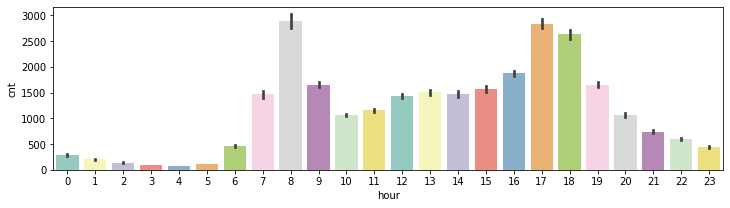

In [14]:
plot_bar(df,'hour')